# Phase 3: Model Explainability with SHAP
In the financial sector, "Black Box" models are not acceptable. Banks must explain why a credit application was rejected. 

In this phase, we use **SHAP (SHapley Additive exPlanations)** to interpret our champion LightGBM model and understand the global and local impact of each feature on the credit score.

In [1]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# 1. Load the Champion Model (V9 Final)
model = joblib.load("../models/credit_model_final_lgbm.joblib")

# 2. Load the Master Dataset
df = pd.read_csv("../data/master_credit_v9.csv")
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

print("Model and Data loaded successfully.")

Model and Data loaded successfully.


In [2]:
# 3. Initialize SHAP TreeExplainer
# This might take a minute depending on your computer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

print("SHAP Values calculated.")

SHAP Values calculated.


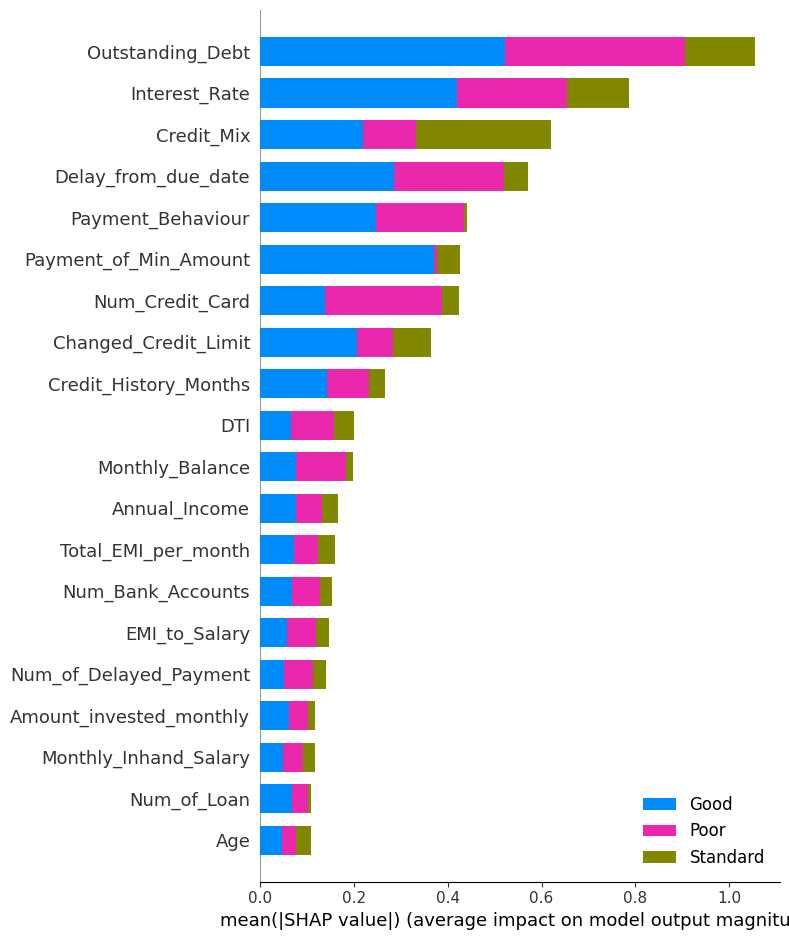

In [3]:
# 4. Summary Plot (Bar Chart)
# Shows the average impact of each feature on the model's decision
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar", class_names=["Poor", "Standard", "Good"])

### Model Interpretability and Decision Mechanism Analysis (SHAP)

In this final analytical phase, we interpret the decision-making logic of our champion **LightGBM** model using **SHAP (SHapley Additive exPlanations)**, a game-theoretic approach. In financial risk management, high accuracy is not enough; providing a transparent explanation for credit decisions (approvals or rejections) is a regulatory requirement (Explainable AI - XAI).

#### **Key Insights and Findings:**

*   **Dominant Features:** The model's decisions are primarily driven by `Outstanding_Debt`, followed by `Interest_Rate` and `Credit_Mix`. This aligns with fundamental banking principles where total liability and historical credit quality are the strongest predictors of risk.
*   **Financial Logic Consistency:** Features such as `Delay_from_due_date` and `Payment_of_min_amount` appear high in the importance list. This confirms that the model has successfully captured behavioral risk factors prevalent in banking literature.
*   **Validation of Feature Engineering:** Our custom-engineered features, `Credit_History_Months` (Age of credit history) and `DTI` (Debt-to-Income ratio), are among the top 10 most influential variables. This validates our preprocessing strategy and confirms that domain-specific ratios significantly enhance the model's predictive power.
*   **Class-Specific Impact:** The SHAP summary plot illustrates the weight of each feature across different credit categories (Poor, Standard, Good), using color-coded segments to show how specific financial behaviors push a customer toward a higher or lower risk bracket.